# UNAD
## Cristian Camilo Aranda Sandoval
## Predicción de calidad en vinos

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [7]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
#Cargamos el dataset y mostramos las 5 primeras filas

Datos = pd.read_csv("winequality-red.csv")
Datos.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [19]:
Datos.shape


(1599, 12)

In [17]:
# Descripción de los datos
Datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
#Identificación de Datos Faltantes y Atípicos

Datos.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

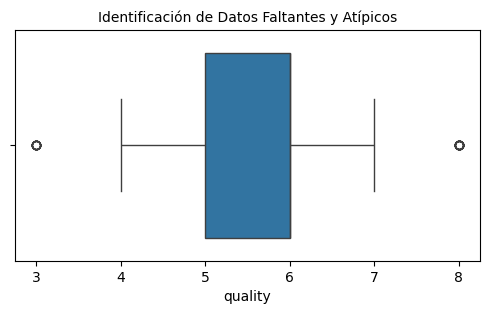

In [28]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['quality'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

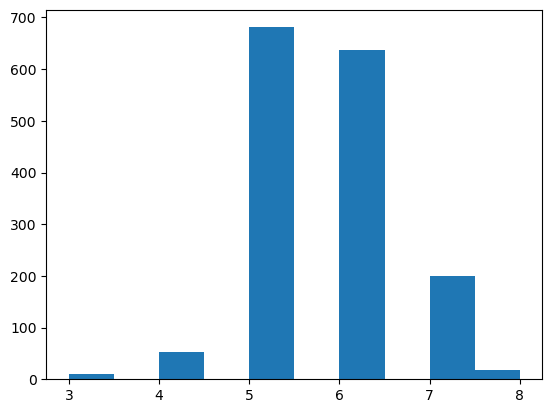

In [31]:
plt.hist(Datos.quality)

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

<Axes: xlabel='density', ylabel='pH'>

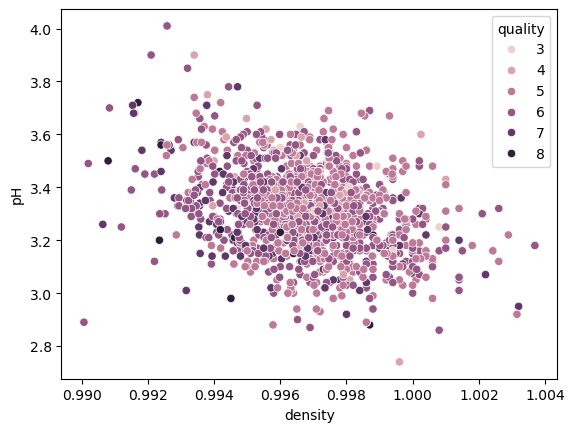

In [35]:
#Identificación de Datos Atípicos

sns.scatterplot(x = "density", y = "pH", hue = "quality", data = data)

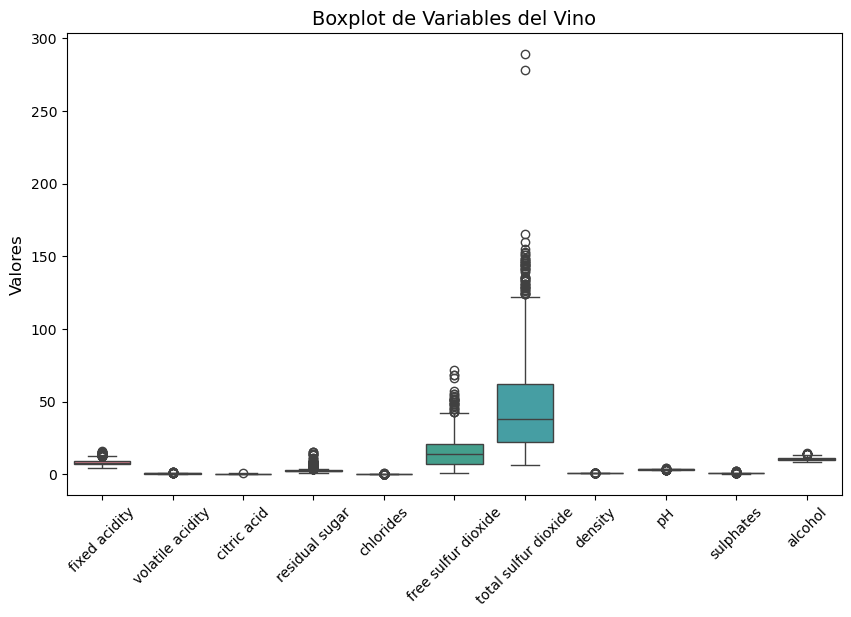

In [70]:
plt.figure(figsize=(10, 6))

# Boxplot de las variables seleccionadas
sns.boxplot(data=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                       'density', 'pH', 'sulphates', 'alcohol']])

# Rotación de las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Título y etiquetas de los ejes
plt.title('Boxplot de Variables del Vino', fontsize=14)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()


In [74]:
# Definimos las columnas predictoras y la columna objetivo
predictors_col = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
    'density', 'pH', 'sulphates', 'alcohol'
]
target_col = ['quality']



In [76]:
predictors = Datos[predictors_col]
target = Datos[target_col]

In [78]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [92]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [52]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [94]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:
* quality: Calidad del vino
* Predecir cual va hacer la calidad del vino

In [56]:
# Total de personas con Diabetes

Datos['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [58]:
Datos[['quality']].head(40)

,quality
0,5
1,5
2,5
3,6
4,5
5,5
6,5
7,7
8,7
9,5


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [124]:

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [104]:
print (X_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
112             8.4             0.600         0.10             2.2      0.085   
889            10.7             0.900         0.34             6.6      0.112   
1229            7.6             0.430         0.29             2.1      0.075   
17              8.1             0.560         0.28             1.7      0.368   
686             7.1             0.650         0.18             1.8      0.070   
...             ...               ...          ...             ...        ...   
742             6.5             0.615         0.00             1.9      0.065   
1552            6.3             0.680         0.01             3.7      0.103   
74              9.7             0.320         0.54             2.5      0.094   
176             7.3             0.380         0.21             2.0      0.080   
338            12.4             0.490         0.58             3.0      0.103   

      free sulfur dioxide  

In [84]:
print (Y_train)

51      6
987     5
1278    6
208     5
944     7
       ..
316     5
233     5
412     5
772     5
702     6
Name: quality, Length: 1199, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

[Text(0.514540258074253, 0.9782608695652174, 'x[10] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.23607002716571085, 0.9347826086956522, 'x[9] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.37530514261998194, 0.9565217391304348, 'True  '),
 Text(0.041412616963477214, 0.8913043478260869, 'x[1] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.015454271053425898, 0.8478260869565217, 'x[4] <= 0.082\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.011590703290069424, 0.8043478260869565, 'x[4] <= 0.059\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.007727135526712949, 0.7608695652173914, 'x[2] <= 0.29\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.0038635677633564744, 0.717391304347826, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.011590703290069424, 0.717391304347826, 'gini = 0.0\nsamples = 1\nvalue 

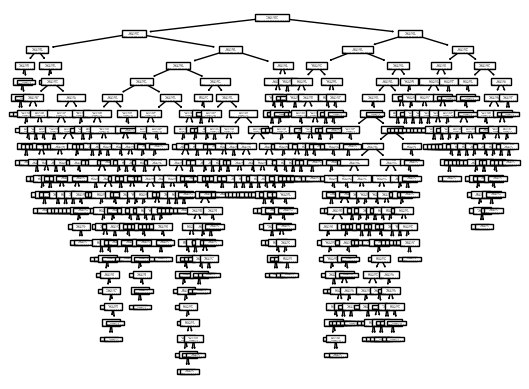

In [102]:
# Construir el modelo de arboles de decisión

tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)

# Crea el modelo de prediccion
plot_tree(arbol)

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [107]:
# Desempeño del modelo

predicciones = arbol.predict(X_test)
predicciones

array([7, 8, 5, 5, 6, 5, 5, 8, 6, 7, 5, 6, 5, 6, 7, 5, 6, 7, 5, 7, 5, 6,
       7, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 4, 6, 5, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 7,
       6, 4, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 6, 6, 5, 5, 5, 6, 5,
       7, 5, 6, 6, 8, 7, 7, 6, 5, 6, 6, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 7,
       7, 7, 6, 6, 5, 5, 6, 7, 5, 5, 5, 4, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 5, 5, 7, 5, 6, 7, 6, 5, 3, 6, 7, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 4, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 7,
       5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6,
       6, 6, 5, 6, 8, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 4, 4, 6, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5,

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

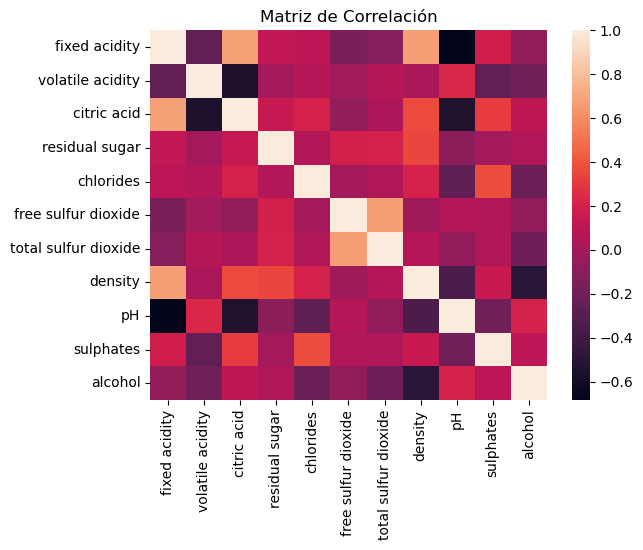

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,1,0,0
4,0,4,3,0,1,0
5,1,2,109,30,3,1
6,0,2,33,76,10,3
7,0,0,3,13,19,0
8,0,0,2,1,3,0


In [122]:
# Examinamos la Matriz de Correlación

sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

# Examinamos la matriz de confusión

pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

In [114]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.65

In [116]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6451557908631773

In [118]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.65

In [120]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6474688551191318

## 8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

- accauracy: exactitud mide los valores reales con las predicciones realizadas lo que significa que el 65% de las predicciones son reales.

- Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "quality" es 0.64, lo que significa que el 64% de los predichos como buena calidad por el modelo eran en realidad de buena calidad.

- Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "quality" es 0,65, lo que indica que el modelo identificó correctamente al 65% de todos los diabéticos.

- F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "quality" es 0,64, lo que indica un equilibrio entre precisión y recuerdo.


De la Matriz de Confusión podemos interpretar:

- de la matriz podemos decir que para la calidad en 5 es la que mayor predicción tiene

- cuando se comparan los datos se observa que tienen errores las predicciones con los actuales esto dice que ahi un error en la predicción


